# Анализ связей между признаками двумерного набора данных

Импорты библиотек:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Проведём предварительную обработку данных:

Импортируем датафрейм:

In [3]:
gym_df = pd.read_csv('C:/Users/dmitr/Downloads/5и7gym_churn.csv')
gym_df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведём названия столбцов к общему виду:

In [4]:
gym_df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [5]:
gym_df = gym_df.rename(columns={'gender': 'Gender'})
gym_df.columns

Index(['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Проверим датафрейм на наличие пропущеных значений:

In [6]:
gym_df.isna().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Проверим датафрейм на наличие явных дубликатов:

In [7]:
print(gym_df.duplicated().sum())

0


Приведём столбец "Month_to_end_contract" к типу данных "int64":

In [8]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [9]:
gym_df.astype({'Month_to_end_contract': 'int64'}).dtypes

Gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                  int64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

Проверим датафрейм на наличие неявных дубликатов:

In [10]:
print("Gender: " + str(gym_df['Gender'].unique()))
print("Near_Location: " + str(gym_df['Near_Location'].unique()))
print("Partner: " + str(gym_df['Partner'].unique()))
print("Promo_friends: " + str(gym_df['Promo_friends'].unique()))
print("Phone: " + str(gym_df['Phone'].unique()))
print("Contract_period: " + str(gym_df['Contract_period'].unique()))
print("Group_visits: " + str(gym_df['Group_visits'].unique()))
print("Age: " + str(gym_df['Age'].unique()))
print("Avg_additional_charges_total: " + str(gym_df['Avg_additional_charges_total'].unique()))
print("Month_to_end_contract: " + str(gym_df['Month_to_end_contract'].unique()))
print("Avg_class_frequency_total: " + str(gym_df['Avg_class_frequency_total'].unique()))
print("Avg_class_frequency_current_month: " + str(gym_df['Avg_class_frequency_current_month'].unique()))
print("Churn: " + str(gym_df['Churn'].unique()))

Gender: [1 0]
Near_Location: [1 0]
Partner: [1 0]
Promo_friends: [1 0]
Phone: [0 1]
Contract_period: [ 6 12  1]
Group_visits: [1 0]
Age: [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Avg_additional_charges_total: [ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
Month_to_end_contract: [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
Avg_class_frequency_total: [0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
Avg_class_frequency_current_month: [0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
Churn: [0 1]


Обработка данных завершена:

In [11]:
gym_df.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Построим точечные диаграммы (матрицы диаграмм рассеяния):

Точечная диаграмма **затрат на дополнительные услуги** от **возраста**:

<AxesSubplot:xlabel='Age', ylabel='Avg_additional_charges_total'>

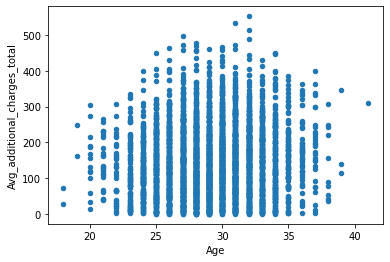

In [12]:
gym_df.plot(x='Age', y='Avg_additional_charges_total', kind='scatter') 

Данная диаграмма рассеивания **не показывает** зависимость между исследуемыми переменными.

Точечная диаграмма **общей средней частоты посещений** от **средней частоты посещений в текущем месяце**:

<AxesSubplot:xlabel='Avg_class_frequency_total', ylabel='Avg_class_frequency_current_month'>

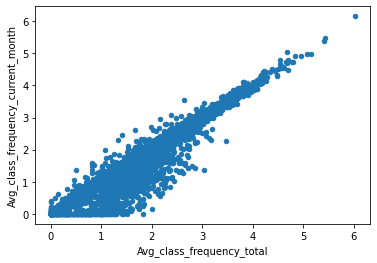

In [13]:
gym_df.plot(x='Avg_class_frequency_total', y='Avg_class_frequency_current_month', kind='scatter')

Данная диаграмма рассеивания **показывает** положительную корреляцию.

Точечная диаграмма **количества месяцев до окончания абонемента** от **длительности текущего абонемента**:

<AxesSubplot:xlabel='Contract_period', ylabel='Month_to_end_contract'>

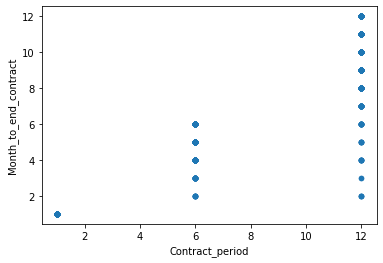

In [14]:
gym_df.plot(x='Contract_period', y='Month_to_end_contract', kind='scatter')

Данная диаграмма рассеивания, также, **показывает** положительную корреляцию.

### Построим матрицу диаграмм рассеяния:

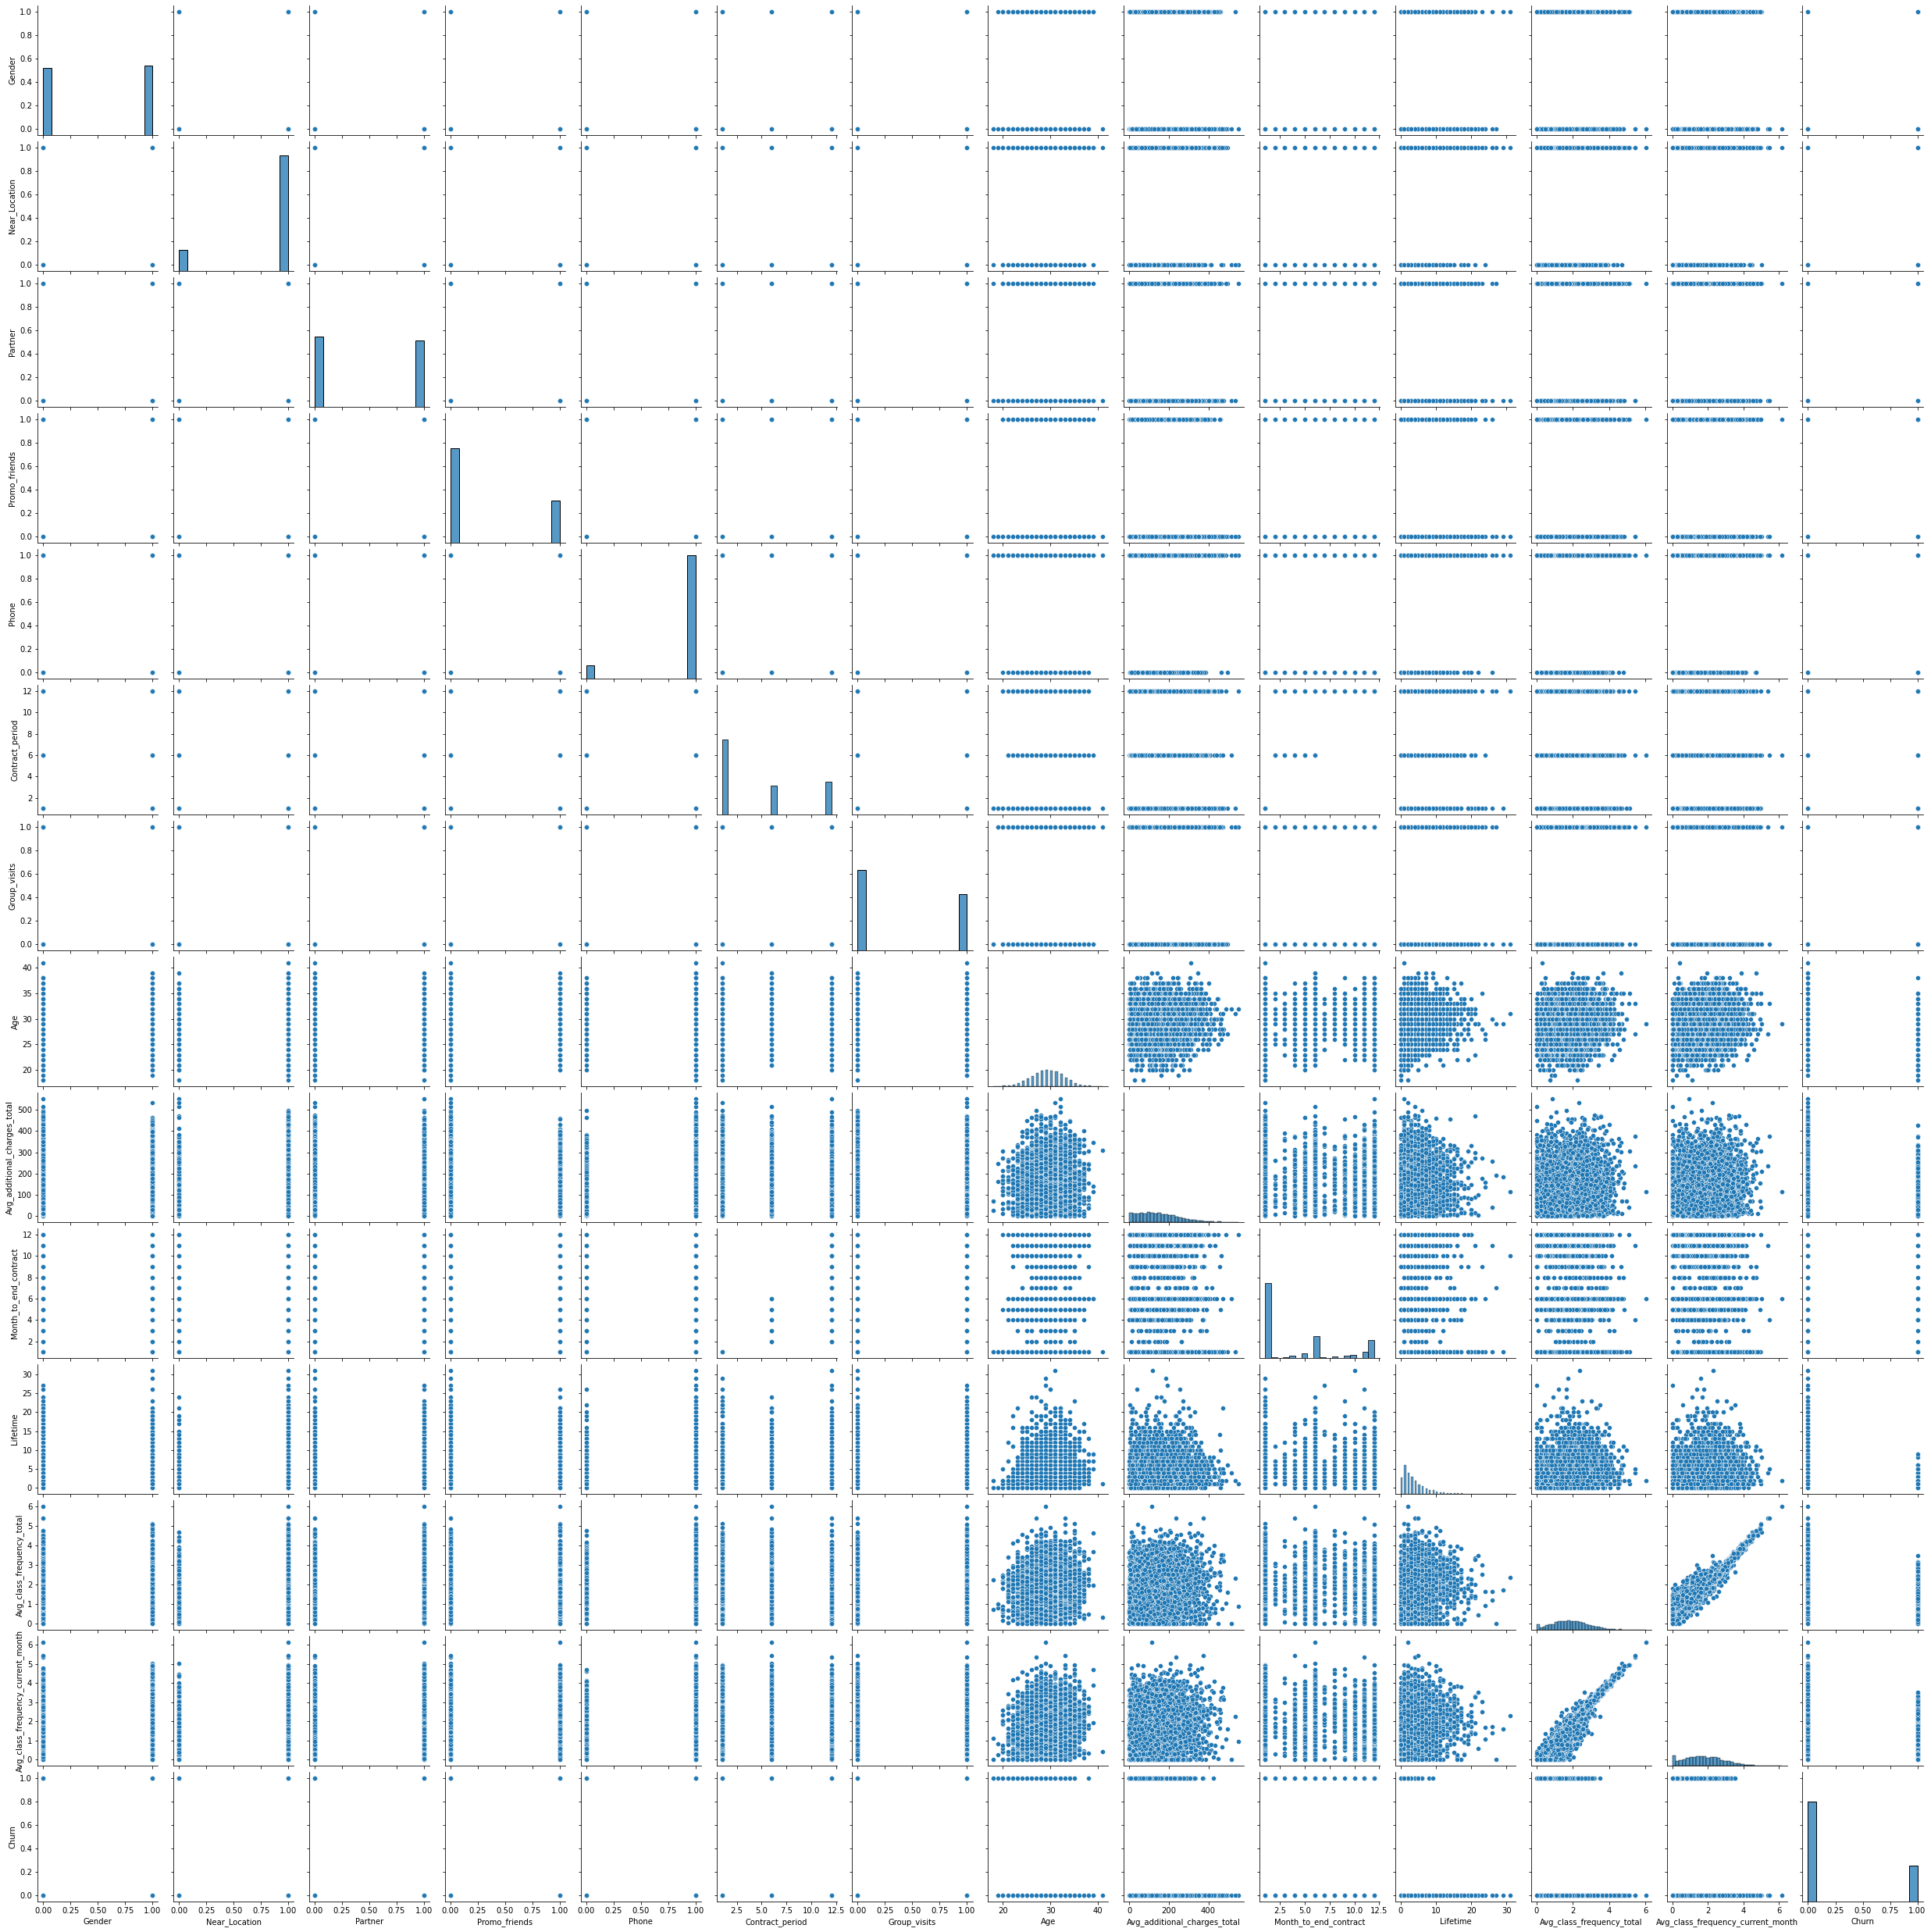

In [15]:
sns.pairplot(gym_df)

Из данной матрицы видно, что корреляция в данном датафрейме присутствует между двумя парами столбцов **Avg_class_frequency_total** и **Avg_class_frequency_current_month**, и **Contract_period** и **Month_to_end_contract**

### Вычислим коэффициент корреляции Пирсона для оценки связи между переменными:

In [16]:
gym_df.corr()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Наиболее больших значений **(0.952739)** и **(0.973064)** коэффициент корреляции Пирсона достигает между значениями **Avg_class_frequency_total** и **Avg_class_frequency_current_month**, **Contract_period** и **Month_to_end_contract** и  что подтверждает наличие взаимосвязи между значениями в этих парах

### Построим heatmap (тепловую карту корреляции):

<AxesSubplot:>

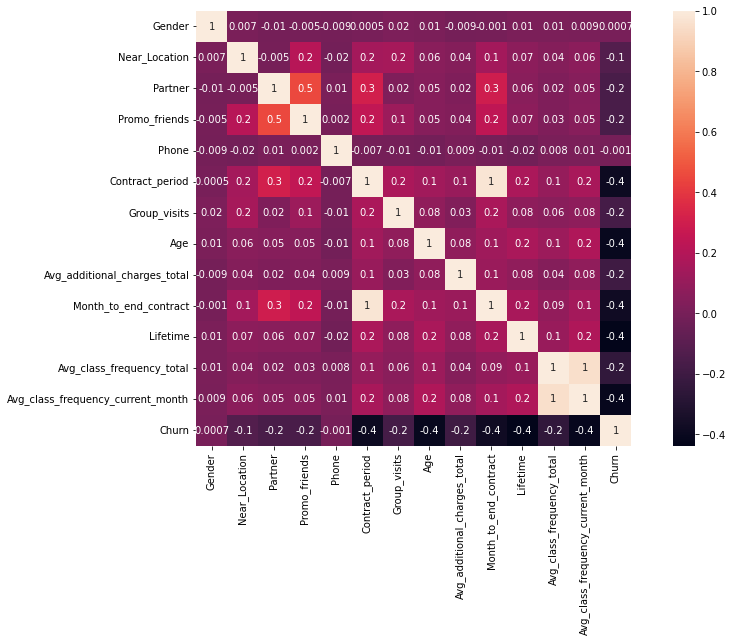

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(gym_df.corr(), annot = True, fmt='.1g', square=True)

**Вывод:** в ходе выполнения работы были изучены методы нахождения связей между признаками двумерного набора данных. Был импортирован и обработан датафрейм, содержащий информацию о посетителях фитнес клуба 5и7gym_churn. На основе данного датасета были построены точечные диаграммы рассеяния, вычеслены коэффициенты корреляции Пирса между парами наборов значений и построена тепловая карта корреляции. В ходе исследования данных было выяснено, что в данном датафрейме связь присутствует между двумя парами столбцов Avg_class_frequency_total (Общая средняя частота посещений) и Avg_class_frequency_current_month (Средняя частота посещений в текущем месяце), и Contract_period (Длительность текущего абонемента) и Month_to_end_contract (Количество месяцев до окончания абонемента).

# Дополнительное задание
Построить boxplot по любому столбцу, вывести describe, проанализировать, построить гистограмму (plot.bar) пришёл по промо друзей/не пришёл по промо друзей.

Построим Boxplot по столбцу 'Age' и выведем его описание при помощи describe:

<AxesSubplot:>

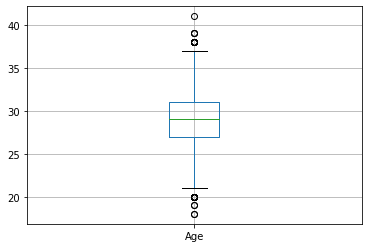

In [18]:
gym_df.boxplot(column=['Age'])

In [19]:
gym_df['Age'].describe()

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: Age, dtype: float64

Из диаграммы размаха видно, что большинство людей, посещающих спортзал имеют возраст от 21 до 37 лет, причём 50% из них - от 27 до 31 года. Однако, существует несколько выбросов: 18, 19, 20, 38, 39 и 41 год. возраст человека в центре ранжированного ряда составляет 29 лет. Из описания столбца видно, что среднее арефметическое возрастов, также очень близко к значению 29, а среднеквадратическое отклонение ≈ 3.26.

Построим гистограмму (Plot.bar) пришёл по промо друзей/не пришёл по промо друзей. Для этого сначала произведём группировку:

In [20]:
gym_df_promo = gym_df.groupby('Promo_friends')['Promo_friends'].count()
gym_df_promo

Promo_friends
0    2766
1    1234
Name: Promo_friends, dtype: int64

Text(0, 0.5, 'Number of people')

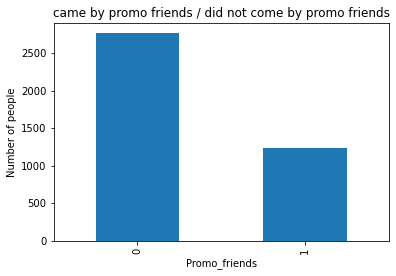

In [24]:
gym_df_promo.plot.bar(y='value')
plt.title("came by promo friends / did not come by promo friends")
plt.ylabel("Number of people")

Из гистограммы видно, что людей пришедших по промокоду друзей более чем в два раза меньше, нежели тех кто записался в спортзал сам.